In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#importing other libraries
#sfor dataviz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#converting categorical data into numerical form, encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#dealing with missing values
from sklearn.impute import SimpleImputer

#for pipelines
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

#
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#for model selection
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.groupby(['Pclass'], as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_data.groupby(['Embarked'], as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [9]:
train_data.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_data.groupby(['SibSp'], as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Here we add a new column: family size to encompass sibSp and Parch

In [11]:
train_data['FamSize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamSize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [13]:
train_data['Age_Cut'] = pd.qcut(train_data['Age'],4)

In [14]:
train_data.groupby(['Age_Cut'], as_index = False, observed = False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 20.125]",0.458101
1,"(20.125, 28.0]",0.360656
2,"(28.0, 38.0]",0.434286
3,"(38.0, 80.0]",0.372881


Here, we transform the Age column to have fewer values, we base it on the above age cut.

In [15]:
train_data.loc[train_data['Age'] <= 19, 'Age'] = 0
train_data.loc[(train_data['Age'] > 19) & (train_data['Age'] <= 25), 'Age'] = 1
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 31.8), 'Age'] = 2
train_data.loc[(train_data['Age'] > 31.8) & (train_data['Age'] <= 41), 'Age'] = 3
train_data.loc[(train_data['Age'] > 41) & (train_data['Age'] <= 80), 'Age'] = 4
train_data.loc[train_data['Age'] > 80, 'Age'] 

test_data.loc[test_data['Age'] <= 19, 'Age'] = 0
test_data.loc[(test_data['Age'] > 19) & (test_data['Age'] <= 25), 'Age'] = 1
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 31.8), 'Age'] = 2
test_data.loc[(test_data['Age'] > 31.8) & (test_data['Age'] <= 41), 'Age'] = 3
test_data.loc[(test_data['Age'] > 41) & (test_data['Age'] <= 80), 'Age'] = 4
test_data.loc[test_data['Age'] > 80, 'Age'] 


Series([], Name: Age, dtype: float64)

In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,"(20.125, 28.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,"(28.0, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(20.125, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,"(28.0, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,"(28.0, 38.0]"


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

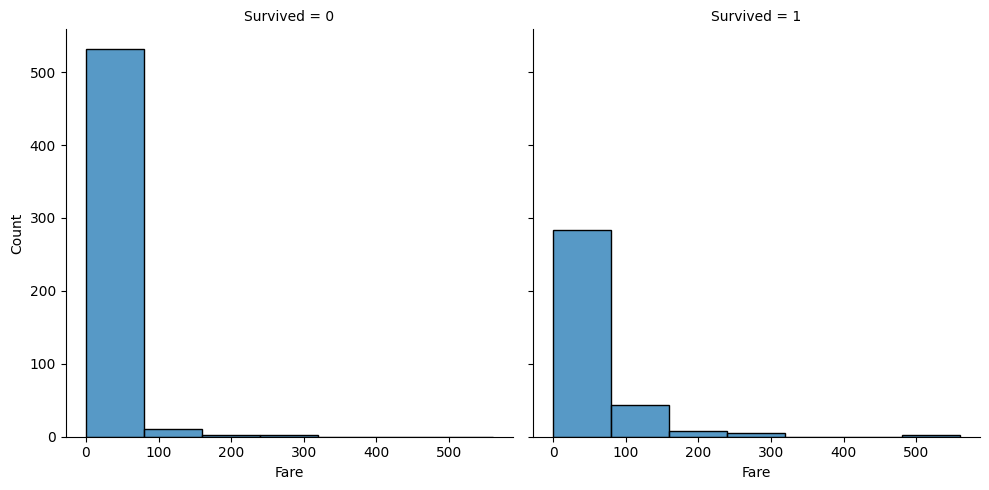

In [17]:
sns.displot(train_data, x = 'Fare', col = 'Survived', binwidth = 80, height = 5)

There is also a large range for Fare values, we'll do a similar cut

In [18]:
train_data['Fare_Cut'] = pd.qcut(train_data['Fare'], 5)
test_data['Fare_Cut'] = pd.qcut(test_data['Fare'], 5)

In [19]:
train_data.groupby(['Fare_Cut'], as_index = False, observed = False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


And we do a similar transformation to the Fare Column to have a smaller range to work with for our model

In [20]:
train_data.loc[train_data['Fare'] <= 7.854, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.854) & (train_data['Fare'] <= 10.5), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 10.5) & (train_data['Fare'] <= 21.679), 'Fare'] = 2
train_data.loc[(train_data['Fare'] > 21.679) & (train_data['Fare'] <= 39.688), 'Fare'] = 3
train_data.loc[(train_data['Fare'] > 39.688) & (train_data['Fare'] <= 512.329), 'Fare'] = 4
train_data.loc[train_data['Fare'] > 512.329, 'Fare'] 

test_data.loc[test_data['Fare'] <= 7.854, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.854) & (test_data['Fare'] <= 10.5), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 10.5) & (test_data['Fare'] <= 21.679), 'Fare'] = 2
test_data.loc[(test_data['Fare'] > 21.679) & (test_data['Fare'] <= 39.688), 'Fare'] = 3
test_data.loc[(test_data['Fare'] > 39.688) & (test_data['Fare'] <= 512.329), 'Fare'] = 4
test_data.loc[test_data['Fare'] > 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,"(20.125, 28.0]","(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,"(28.0, 38.0]","(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,"(20.125, 28.0]","(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,"(28.0, 38.0]","(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,"(28.0, 38.0]","(7.854, 10.5]"


There's a lot we could extract from names. The most obvious would be the title (Mrs, Sir...) which could indicate class, marital situation, gender. We start by extracting the titles: 

In [22]:
train_data['Title'] = train_data['Name'].str.split(pat = ',', expand = True)[1].str.split(pat = '.', expand = True)[0]
test_data['Title'] = test_data['Name'].str.split(pat = ',', expand = True)[1].str.split(pat = '.', expand = True)[0]

In [23]:
train_data.groupby(['Title'], as_index = False, observed = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


Cool, but too much. We can split it as so: Nobility, Military, Unmarried female, etc

In [24]:
train_data['Title'] = train_data['Title'].str.strip()
train_data['Title'] = train_data['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    
    'Jonkheer' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Don' : 'Noble',
    'the Countess' : 'Noble',
    
    'Miss' : 'Unmarried_Female',
    'Ms' : 'Unmarried_Female',
    'Mlle' : 'Unmarried_Female',
    
    'Mrs' : 'Married_Female',
    'Mme' : 'Married_Female'
})

test_data['Title'] = test_data['Title'].str.strip()
test_data['Title'] = test_data['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    
    'Jonkheer' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Don' : 'Noble',
    'the Countess' : 'Noble',
    
    'Miss' : 'Unmarried_Female',
    'Ms' : 'Unmarried_Female',
    'Mlle' : 'Unmarried_Female',
    
    'Mrs' : 'Married_Female',
    'Mme' : 'Married_Female'
})

In [25]:
train_data.groupby(['Title'], as_index = False, observed = False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Married_Female,126,0.793651
2,Master,40,0.575000
3,Military,5,0.400000
4,Mr,517,0.156673
5,Noble,5,0.600000
6,Rev,6,0.000000
7,Unmarried_Female,185,0.702703


Easier to read eh. Now we'll extract the name length. The logic is if someone's name is longer, they might be more important. I don't know if I agree personally with the logic but let's see if it leads somewhere.

In [26]:
train_data['Name_Length'] = train_data['Name'].apply(lambda x:len(x))
test_data['Name_Length'] = test_data['Name'].apply(lambda x:len(x))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


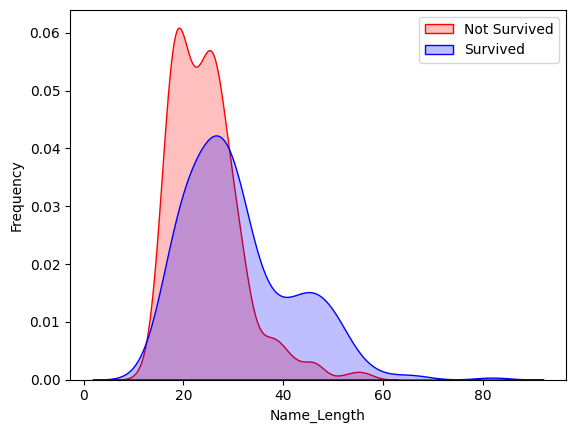

In [27]:
g = sns.kdeplot(train_data['Name_Length'][(train_data['Survived']==0) & (train_data['Name_Length'].notnull())], color = 'Red', fill = True)
g = sns.kdeplot(train_data['Name_Length'][(train_data['Survived']==1) & (train_data['Name_Length'].notnull())], ax = g, color = 'Blue', fill = True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

It looks like name length does matter. Time for another qcut then

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Age_Cut,Fare_Cut,Title,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,"(20.125, 28.0]","(-0.001, 7.854]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,51
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,"(20.125, 28.0]","(7.854, 10.5]",Unmarried_Female,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,44
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,"(28.0, 38.0]","(7.854, 10.5]",Mr,24


In [29]:
train_data['Name_LengthGB'] = pd.qcut(train_data['Name_Length'], 3)
test_data['Name_LengthGB'] = pd.qcut(test_data['Name_Length'], 3)

In [30]:
train_data.groupby(['Name_LengthGB'], as_index = False, observed = False)['Survived'].mean()

,Name_LengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [31]:
train_data.loc[train_data['Name_Length'] <= 22, 'Name_Size'] = 0
train_data.loc[(train_data['Name_Length'] > 22) & (train_data['Name_Length'] <= 28), 'Name_Size'] = 1
train_data.loc[(train_data['Name_Length'] > 28) & (train_data['Name_Length'] <= 82), 'Name_Size'] = 2
train_data.loc[train_data['Name_Length'] > 82, 'Name_Size'] 

test_data.loc[test_data['Name_Length'] <= 22, 'Name_Size'] = 0
test_data.loc[(test_data['Name_Length'] > 22) & (test_data['Name_Length'] <= 28), 'Name_Size'] = 1
test_data.loc[(test_data['Name_Length'] > 28) & (test_data['Name_Length'] <= 82), 'Name_Size'] = 2
test_data.loc[test_data['Name_Length'] > 82, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,NaN,S,2,"(20.125, 28.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,C85,C,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,51,"(28.0, 82.0]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,"(20.125, 28.0]","(7.854, 10.5]",Unmarried_Female,22,"(11.999, 22.0]",0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,C123,S,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,44,"(28.0, 82.0]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,NaN,S,1,"(28.0, 38.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0


Now let's look at ticket price

In [33]:
train_data['Ticket_Num'] = train_data['Ticket'].apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))
test_data['Ticket_Num'] = test_data['Ticket'].apply(lambda x : pd.Series({'Ticket' : x.split()[-1]}))

In [34]:
train_data.groupby(['Ticket_Num'], as_index = False, observed = False)['Survived'].agg(['count','mean']).sort_values('count', ascending = False)

,Ticket_Num,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


Some ticket numbers are more common than others, let's create a count on our dataframe

In [35]:
train_data.groupby('Ticket_Num')['Ticket_Num'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Num, Length: 891, dtype: int64

In [36]:
train_data['Ticket_Num_Counts'] = train_data.groupby('Ticket_Num')['Ticket_Num'].transform('count')
test_data['Ticket_Num_Counts'] = test_data.groupby('Ticket_Num')['Ticket_Num'].transform('count')

In [37]:
train_data.groupby(['Ticket_Num_Counts'], as_index = False, observed = False)['Survived'].agg(['count','mean']).sort_values('count', ascending = False)

,Ticket_Num_Counts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


Maybe a little hard to figure out what this might mean, leave it for the improvements

In [38]:
train_data['Ticket'].str.split(pat = " ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


Tickets are not easy to extract info from, we'll move to cabin

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamSize,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,Ticket_Num,Ticket_Num_Counts
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,"(20.125, 28.0]","(-0.001, 7.854]",Mr,23,"(22.0, 28.0]",1.0,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,C,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,51,"(28.0, 82.0]",2.0,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,"(20.125, 28.0]","(7.854, 10.5]",Unmarried_Female,22,"(11.999, 22.0]",0.0,3101282,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,4.0,...,S,2,"(28.0, 38.0]","(39.688, 512.329]",Married_Female,44,"(28.0, 82.0]",2.0,113803,2
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,1.0,...,S,1,"(28.0, 38.0]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0,373450,1


In [40]:
train_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [41]:
train_data['Cabin'] = train_data['Cabin'].fillna('U')
train_data['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_data['Cabin']])

test_data['Cabin'] = test_data['Cabin'].fillna('U')
test_data['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_data['Cabin']])

In [42]:
train_data.groupby(['Cabin'], as_index = False, observed = False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [43]:
train_data['Cabin_Assigned'] = train_data['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)
test_data['Cabin_Assigned'] = test_data['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)

In [44]:
train_data.groupby(['Cabin_Assigned'], as_index = False, observed = False)['Survived'].agg(['count','mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


Clear results.

> We're done with data exploration. Now we begin to clean and prepare for building our models

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                714 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Cabin              891 non-null    object  
 11  Embarked           889 non-null    object  
 12  FamSize            891 non-null    int64   
 13  Age_Cut            714 non-null    category
 14  Fare_Cut           891 non-null    category
 15  Title              891 non-null    object  
 16  Name_Len

Notice some of the columns have missing values. We need to fix that

In [46]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamSize', 'Age_Cut',
       'Fare_Cut', 'Title', 'Name_Length', 'Name_LengthGB', 'Name_Size',
       'Ticket_Num', 'Ticket_Num_Counts', 'Cabin_Assigned'],
      dtype='object')

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        418 non-null    int64   
 1   Pclass             418 non-null    int64   
 2   Name               418 non-null    object  
 3   Sex                418 non-null    object  
 4   Age                332 non-null    float64 
 5   SibSp              418 non-null    int64   
 6   Parch              418 non-null    int64   
 7   Ticket             418 non-null    object  
 8   Fare               417 non-null    float64 
 9   Cabin              418 non-null    object  
 10  Embarked           418 non-null    object  
 11  FamSize            418 non-null    int64   
 12  Fare_Cut           417 non-null    category
 13  Title              418 non-null    object  
 14  Name_Length        418 non-null    int64   
 15  Name_LengthGB      418 non-null    category
 16  Name_Siz

Let's fill the missing values for age with the mean age

In [48]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)



test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

/tmp/ipykernel_19/3169394202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
/tmp/ipykernel_19/3169394202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [49]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy = 'most_frequent')

Ordinal Encoder is if theres an inherent ranking on things. 

In [50]:
ode_cols = ['FamSize']
ohe_cols = ['Sex', 'Embarked']

In [51]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,Ticket_Num,Ticket_Num_Counts,Cabin_Assigned
0,892,3,"Kelly, Mr. James",male,3.0,0,0,330911,0.0,U,Q,1,"(7.796, 11.025]",Mr,16,"(12.999, 22.0]",0.0,330911,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,4.0,1,0,363272,0.0,U,S,2,"(-0.001, 7.796]",Married_Female,32,"(28.0, 63.0]",2.0,363272,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,4.0,0,0,240276,1.0,U,Q,1,"(7.796, 11.025]",Mr,25,"(22.0, 28.0]",1.0,240276,1,0
3,895,3,"Wirz, Mr. Albert",male,2.0,0,0,315154,1.0,U,S,1,"(7.796, 11.025]",Mr,16,"(12.999, 22.0]",0.0,315154,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,2.0,U,S,3,"(11.025, 21.438]",Married_Female,44,"(28.0, 63.0]",2.0,3101298,1,0


In [52]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamSize', 'Age_Cut',
       'Fare_Cut', 'Title', 'Name_Length', 'Name_LengthGB', 'Name_Size',
       'Ticket_Num', 'Ticket_Num_Counts', 'Cabin_Assigned'],
      dtype='object')

In [53]:
X = train_data.drop(['Survived'], axis = 1)
y = train_data['Survived']
X_test = test_data.drop(['Fare_Cut'], axis = 1)

Train test split

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 21)

Now it's time to build pipelines...

In [55]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [56]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [57]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'Ticket_Num_Counts'])
    ],
    remainder='drop',
    n_jobs=-1)

> Now we can look at our models. 
These are from Ryan Nolan's Titanic Notebook with changes to the parameter values

Random Forest

In [58]:
rfc = RandomForestClassifier()

In [59]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [60]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [61]:
print(X_train.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamSize', 'Age_Cut', 'Fare_Cut',
       'Title', 'Name_Length', 'Name_LengthGB', 'Name_Size', 'Ticket_Num',
       'Ticket_Num_Counts', 'Cabin_Assigned'],
      dtype='object')


In [62]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamSize,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,Ticket_Num,Ticket_Num_Counts,Cabin_Assigned
67,68,3,"Crease, Mr. Ernest James",male,0.000000,0,0,S.P. 3464,1.0,U,...,1,"(0.419, 20.125]","(7.854, 10.5]",Mr,24,"(22.0, 28.0]",1.0,3464,1,0
154,155,3,"Olsen, Mr. Ole Martin",male,1.948179,0,0,Fa 265302,0.0,U,...,1,NaN,"(-0.001, 7.854]",Mr,21,"(11.999, 22.0]",0.0,265302,1,0
883,884,2,"Banfield, Mr. Frederick James",male,2.000000,0,0,C.A./SOTON 34068,1.0,U,...,1,"(20.125, 28.0]","(7.854, 10.5]",Mr,29,"(28.0, 82.0]",2.0,34068,1,0
499,500,3,"Svensson, Mr. Olof",male,1.000000,0,0,350035,0.0,U,...,1,"(20.125, 28.0]","(-0.001, 7.854]",Mr,18,"(11.999, 22.0]",0.0,350035,1,0
519,520,3,"Pavlovic, Mr. Stefo",male,3.000000,0,0,349242,1.0,U,...,1,"(28.0, 38.0]","(7.854, 10.5]",Mr,19,"(11.999, 22.0]",0.0,349242,1,0


In [63]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [64]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 500}
0.8229981286319313


Decision Tree

In [65]:
dtc = DecisionTreeClassifier()

In [66]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [67]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [68]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [69]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.7977346597064907


K Neighbours

In [70]:
knn = KNeighborsClassifier()

In [71]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [72]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [73]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [74]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.8062050625430908


Support Vector

In [75]:
svc = SVC(probability=True)

In [76]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [77]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [78]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [79]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.7948980596867921


Logistic Regression

In [80]:
lr = LogisticRegression()

In [81]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [82]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [83]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [84]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8019895597360387


Naive Bayes

In [85]:
gnb = GaussianNB()

In [86]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [87]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [88]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['FamSize']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impu...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'Ticket_Num_Counts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [89]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7767654880330938


Now we export all this data to see how well each model performed

In [90]:
Y_pred1 = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)

In [91]:
submission1 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred1
})

submission2 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerID' : test_data['PassengerId'],
    'Survived' : Y_pred6
})

In [92]:
submission1.to_csv('/kaggle/working/submission0511_1.csv', index = False)
submission2.to_csv('/kaggle/working/submission0511_2.csv', index = False)
submission3.to_csv('/kaggle/working/submission0511_3.csv', index = False)
submission4.to_csv('/kaggle/working/submission0511_4.csv', index = False)
submission5.to_csv('/kaggle/working/submission0511_5.csv', index = False)
submission6.to_csv('/kaggle/working/submission0511_6.csv', index = False)